In [33]:
from statsbombpy import sb

import pandas as pd
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')
df_glob = sb.competitions()
list_global_freekick_shot, list_global_freekick_pass= [], []

for competition_id, season_id in tqdm(zip(df_glob.competition_id, df_glob.season_id), total=len(df_glob.competition_id)):
    df_matches = sb.matches(competition_id=competition_id, season_id=season_id)

    for match_id in tqdm(df_matches.match_id):
        df_event = sb.events(match_id=match_id)
        df_freekick = df_event[df_event['play_pattern']=='From Free Kick']

        df_freekick_shot = df_freekick[df_freekick['type']=='Shot']
        df_freekick_pass = df_freekick[df_freekick['type']=='Pass']

        list_global_freekick_shot.append(df_freekick_shot)
        list_global_freekick_pass.append(df_freekick_pass)

df_global_freekick_shot = pd.concat(list_global_freekick_shot, ignore_index=True)
df_global_freekick_pass = pd.concat(list_global_freekick_pass, ignore_index=True)

100%|██████████| 74/74 [30:09<00:00, 24.46s/it]


In [37]:
df_global_freekick_pass.to_csv('freekick_pass.csv')
df_global_freekick_shot.to_csv('freekick_shot.csv')

In [93]:
df_global_freekick_shot = pd.read_csv('freekick_shot.csv', index_col=0)

# df_global_freekick_shot = df_global_freekick_shot[df_global_freekick_shot.shot_outcome == 'Goal']
df_global_freekick_shot_filtered = df_global_freekick_shot[df_global_freekick_shot.shot_type == 'Free Kick']

df_global_freekick_shot_filtered.to_csv('freekick_shot_filtered.csv')

In [92]:
df_global_freekick_pass = pd.read_csv('freekick_pass.csv', index_col=0)

df_global_freekick_pass_filtered = df_global_freekick_pass[df_global_freekick_pass.pass_type == 'Free Kick']

df_global_freekick_pass_filtered.to_csv('freekick_pass_filtered.csv')

In [95]:
len(df_global_freekick_shot_filtered)

4221

In [88]:
df_global_freekick_pass = pd.read_csv('freekick_pass.csv', index_col=0)

df_global_freekick_pass = df_global_freekick_pass[df_global_freekick_pass.pass_type == 'Free Kick']
df_global_freekick_pass = df_global_freekick_pass[df_global_freekick_pass.pass_goal_assist == True]

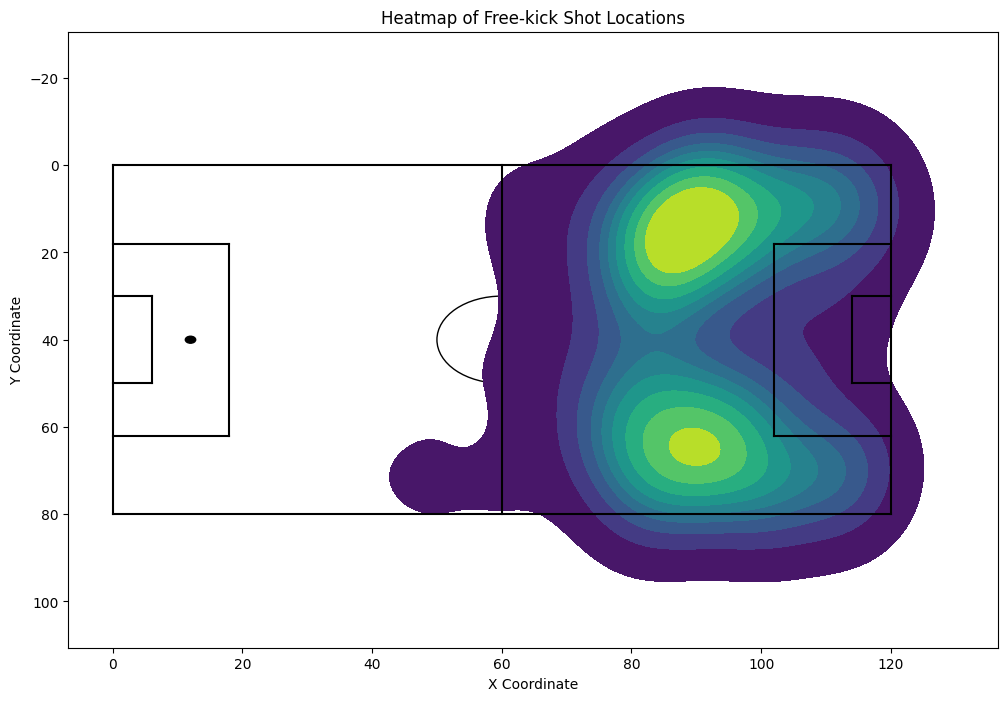

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Assuming df_global_freekick_shot is already defined
# df_global_freekick_shot = ...

# Extract the coordinates from the 'location' column
coordinates = df_global_freekick_pass['location'].dropna().to_list()

coordinates = [ast.literal_eval(coord) for coord in coordinates]
x_coords = [int(coord[0]) for coord in coordinates]
y_coords = [int(coord[1]) for coord in coordinates]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Pitch Outline & Centre Line
plt.plot([0, 0], [0, 80], color="black")
plt.plot([0, 120], [80, 80], color="black")
plt.plot([120, 120], [80, 0], color="black")
plt.plot([120, 0], [0, 0], color="black")
plt.plot([60, 60], [0, 80], color="black")

# Left Penalty Area
plt.plot([0, 18], [18, 18], color="black")
plt.plot([18, 18], [18, 62], color="black")
plt.plot([18, 0], [62, 62], color="black")

# Right Penalty Area
plt.plot([120, 102], [18, 18], color="black")
plt.plot([102, 102], [18, 62], color="black")
plt.plot([102, 120], [62, 62], color="black")

# Left 6-yard Box
plt.plot([0, 6], [30, 30], color="black")
plt.plot([6, 6], [30, 50], color="black")
plt.plot([6, 0], [50, 50], color="black")

# Right 6-yard Box
plt.plot([120, 114], [30, 30], color="black")
plt.plot([114, 114], [30, 50], color="black")
plt.plot([114, 120], [50, 50], color="black")

# Prepare Circles; 10 yard circle at the centre and 1 yard circle at penalty spot
centreCircle = plt.Circle((60, 40), 10, color="black", fill=False)
centreSpot = plt.Circle((60, 40), 0.8, color="black")
leftPenSpot = plt.Circle((12, 40), 0.8, color="black")
rightPenSpot = plt.Circle((108, 40), 0.8, color="black")

# Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

# # Plot coordinates
# coords = [
#     (0, 0), (60, 0), (120, 0), (0, 80), (60, 80), (120, 80),
#     (0, 18), (18, 18), (18, 62), (0, 62), (0, 30), (6, 30),
#     (6, 50), (0, 50), (0, 36), (0, 44), (12, 40),
#     (102, 18), (120, 18), (120, 62), (102, 62), (114, 30), (120, 30),
#     (120, 50), (114, 50), (120, 36), (120, 44), (108, 40)
# ]

# for coord in coords:
#     ax.text(coord[0], coord[1], str(coord), color="red", fontsize=8, ha='right')

# Create a heatmap
sns.kdeplot(x=x_coords, y=y_coords, fill=True, cmap="viridis", ax=ax)

# Set plot titles and labels
plt.title('Heatmap of Free-kick Shot Locations')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()  # Invert y-axis for correct field orientation

# Display the pitch with heatmap
plt.show()


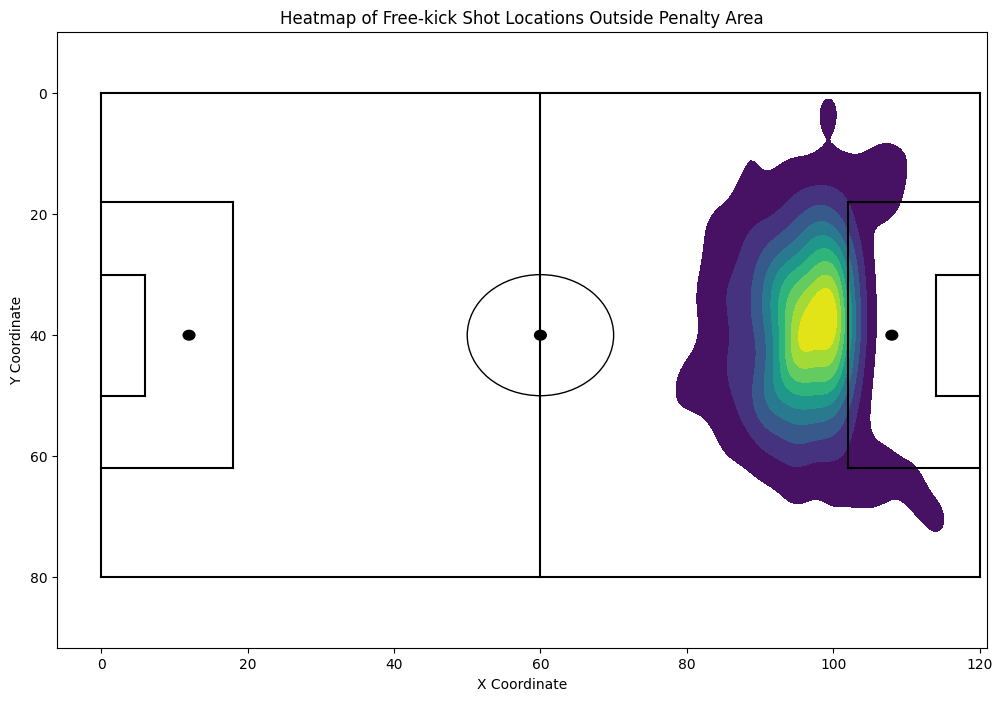

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_global_freekick_shot is already defined
# df_global_freekick_shot = ...

# Extract the coordinates from the 'location' column
coordinates = df_global_freekick_shot['location'].dropna()
filtered_coords = []

# Define function to check if a point is outside the penalty area
def is_outside_penalty_area(coord):
    x, y = coord
    # Left penalty area
    if (0 <= x <= 18) and (18 <= y <= 62):
        return False
    # Right penalty area
    if (102 <= x <= 120) and (18 <= y <= 62):
        return False
    return True

# Filter the coordinates
for coord in coordinates:
    if is_outside_penalty_area(coord):
        filtered_coords.append(coord)

# Separate x and y coordinates
x_coords = [coord[0] for coord in filtered_coords]
y_coords = [coord[1] for coord in filtered_coords]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Pitch Outline & Centre Line
plt.plot([0, 0], [0, 80], color="black")
plt.plot([0, 120], [80, 80], color="black")
plt.plot([120, 120], [80, 0], color="black")
plt.plot([120, 0], [0, 0], color="black")
plt.plot([60, 60], [0, 80], color="black")

# Left Penalty Area
plt.plot([0, 18], [18, 18], color="black")
plt.plot([18, 18], [18, 62], color="black")
plt.plot([18, 0], [62, 62], color="black")

# Right Penalty Area
plt.plot([120, 102], [18, 18], color="black")
plt.plot([102, 102], [18, 62], color="black")
plt.plot([102, 120], [62, 62], color="black")

# Left 6-yard Box
plt.plot([0, 6], [30, 30], color="black")
plt.plot([6, 6], [30, 50], color="black")
plt.plot([6, 0], [50, 50], color="black")

# Right 6-yard Box
plt.plot([120, 114], [30, 30], color="black")
plt.plot([114, 114], [30, 50], color="black")
plt.plot([114, 120], [50, 50], color="black")

# Prepare Circles; 10 yard circle at the centre and 1 yard circle at penalty spot
centreCircle = plt.Circle((60, 40), 10, color="black", fill=False)
centreSpot = plt.Circle((60, 40), 0.8, color="black")
leftPenSpot = plt.Circle((12, 40), 0.8, color="black")
rightPenSpot = plt.Circle((108, 40), 0.8, color="black")

# Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

# Create a heatmap
sns.kdeplot(x=x_coords, y=y_coords, fill=True, cmap="viridis", thresh=0.05, ax=ax)

# Set plot titles and labels
plt.title('Heatmap of Free-kick Shot Locations Outside Penalty Area')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()  # Invert y-axis for correct field orientation

# Display the pitch with heatmap
plt.show()
